In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
%matplotlib inline

In [4]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'date_point_pop_only.csv')
df = pd.read_csv(data_path, delimiter=',')
df.set_index('id', inplace=True)

df_smoothed = df.apply(lambda row: row.rolling(window=14, min_periods=1).mean(), axis=1)
df_smoothed

,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,...,2023-05-20,2023-05-21,2023-05-22,2023-05-23,2023-05-24,2023-05-25,2023-05-26,2023-05-27,2023-05-28,2023-05-29
id,,,,,,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
003vvx7Niy0yvhvHt4a68B,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
00Blm7zeNqgYLPtW6zg8cj,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
00EPIEnX1JFjff8sC6bccd,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
00ko9WaS4jOX1kEk3gvHjf,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7yq4Qj7cqayVTp3FF9CWbm,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,...,63.142857,63.5,63.571429,64.428571,65.5,66.142857,67.357143,67.571429,67.714286,68.857143
7ytR5pFWmSjzHJIeQkgog4,0.0,0.0,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7yyRTcZmCiyzzJlNzGC9Ol,170.0,163.5,160.666667,159.25,158.6,158.0,157.285714,157.000,156.555556,156.1,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


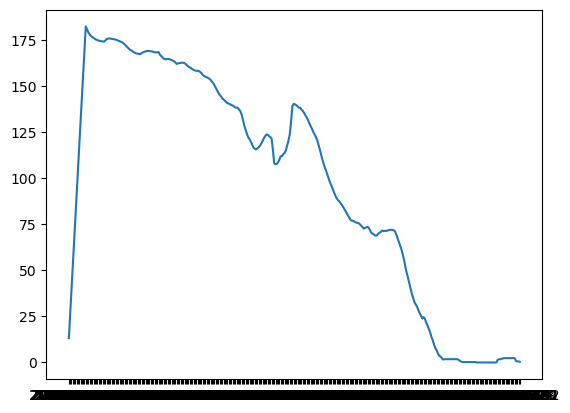

In [5]:
sample = df_smoothed.sample(n=1).iloc[0]
# sample = df_clean[df_clean["id"] == "3LtpKP5abr2qqjunvjlX5i"].iloc[0]
non_zero_indices = np.nonzero(sample.values)[0]
first_non_zero = non_zero_indices[0]
last_non_zero = non_zero_indices[-1]

plt.plot(sample.iloc[first_non_zero:last_non_zero])

In [33]:
# Add hit_type column and fill with -1 (unlabelled)
df['hit_type'] = -1
df.loc[df['id']=='6KfoDhO4XUWSbnyKjNp9c4','hit_type'] = 'Comeback'
df.loc[df['id']=='0XLOf9LhyazPX9Ld8jPiUq','hit_type'] = 'Standard'
df.loc[df['id']=='07KXEDMj78x68D884wgVEm','hit_type'] = 'Standard'
df.loc[df['id']=='3Z3QhZAZpqwZa1phsbQ3JZ','hit_type'] = 'Periodic'
df.loc[df['id']=='7aZusA4cWXz3Wv9e9uhavz','hit_type'] = 'Standard'
df.loc[df['id']=='2771LMNxwf62FTAdpJMQfM','hit_type'] = 'Standard'
df.loc[df['id']=='0RiRZpuVRbi7oqRdSMwhQY','hit_type'] = 'Alltime'
df.loc[df['id']=='6RUKPb4LETWmmr3iAEQktW','hit_type'] = 'Alltime'
df.loc[df['id']=='5uCax9HTNlzGybIStD3vDh','hit_type'] = 'Alltime'
df.loc[df['id']=='2TE4xW3ImvpltVU0cPcKUn','hit_type'] = 'Periodic'
df.loc[df['id']=='15coTBAzEN1bOeipoNDZAR','hit_type'] = 'Periodic'
df.loc[df['id']=='2jyjhRf6DVbMPU5zxagN2h','hit_type'] = 'Comeback'
df.loc[df['id']=='60a0Rd6pjrkxjPbaKzXjfq','hit_type'] = 'Comeback'
df.loc[df['id']=='4xkOaSrkexMciUUogZKVTS','hit_type'] = 'Comeback'
df.loc[df['id']=='6gBFPUFcJLzWGx4lenP6h2','hit_type'] = 'Comeback'
df.loc[df['id']=='0Sfn2TYbpQtCGMBf6C0Y6T','hit_type'] = 'Standard'
df.loc[df['id']=='5GXAXm5YOmYT0kL5jHvYBt','hit_type'] = 'Comeback'
df.loc[df['id']=='1xznGGDReH1oQq0xzbwXa3','hit_type'] = 'Alltime'
df.loc[df['id']=='0bYg9bo50gSsH3LtXe2SQn','hit_type'] = 'Periodic'
df.loc[df['id']=='3AJwUDP919kvQ9QcozQPxg','hit_type'] = 'Alltime'
df.loc[df['id']=='62aP9fBQKYKxi7PDXwcUAS','hit_type'] = 'Standard'
df.loc[df['id']=='25sgk305KZfyuqVBQIahim','hit_type'] = 'Standard'
df.loc[df['id']=='0jT8Nl0shPS8115is0wD2Q','hit_type'] = 'Standard'
df.loc[df['id']=='6xTU6B6nFwKKTSZ9ySXS80','hit_type'] = 'Standard'
df.loc[df['id']=='2dqLk7ezV15LEJEwUmEbXB','hit_type'] = 'Standard'
X_train = df[df['hit_type'] != -1].drop(columns=['hit_type','id'])
y_train = df[df['hit_type'] != -1]['hit_type']

In [34]:
svc = SVC(probability=True, gamma="auto")
self_training_model = SelfTrainingClassifier(svc)
self_training_model.fit(X_t, y_train)
y_pred = self_training_model.predict(X)
df['y_pred'] = y_pred
df['y_pred'].value_counts()

/opt/conda/lib/python3.9/site-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


Standard    3666
Comeback       6
Alltime        5
Periodic       4
Name: y_pred, dtype: int64

In [35]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
rng = np.random.RandomState(42)
iris = datasets.load_iris()
random_unlabeled_points = rng.rand(iris.target.shape[0]) < 0.3
iris.target[random_unlabeled_points] = -1
svc = SVC(probability=True, gamma="auto")
self_training_model = SelfTrainingClassifier(svc)
self_training_model.fit(iris.data, iris.target)

SelfTrainingClassifier(base_estimator=SVC(gamma='auto', probability=True))

In [39]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  